In [38]:
import pandas as pd
from sklearn.datasets import load_iris

In [39]:
df = load_iris(as_frame=True)["data"]
y = load_iris(as_frame=True)["target"]
df["species"] = y
df = df.rename({"petal width (cm)": "petal_width",
            "petal length (cm)": "petal_length",
            "sepal length (cm)": "sepal_length",
            "sepal width (cm)": "sepal_width",
}, axis =1)

# Plot and check individual data distribution

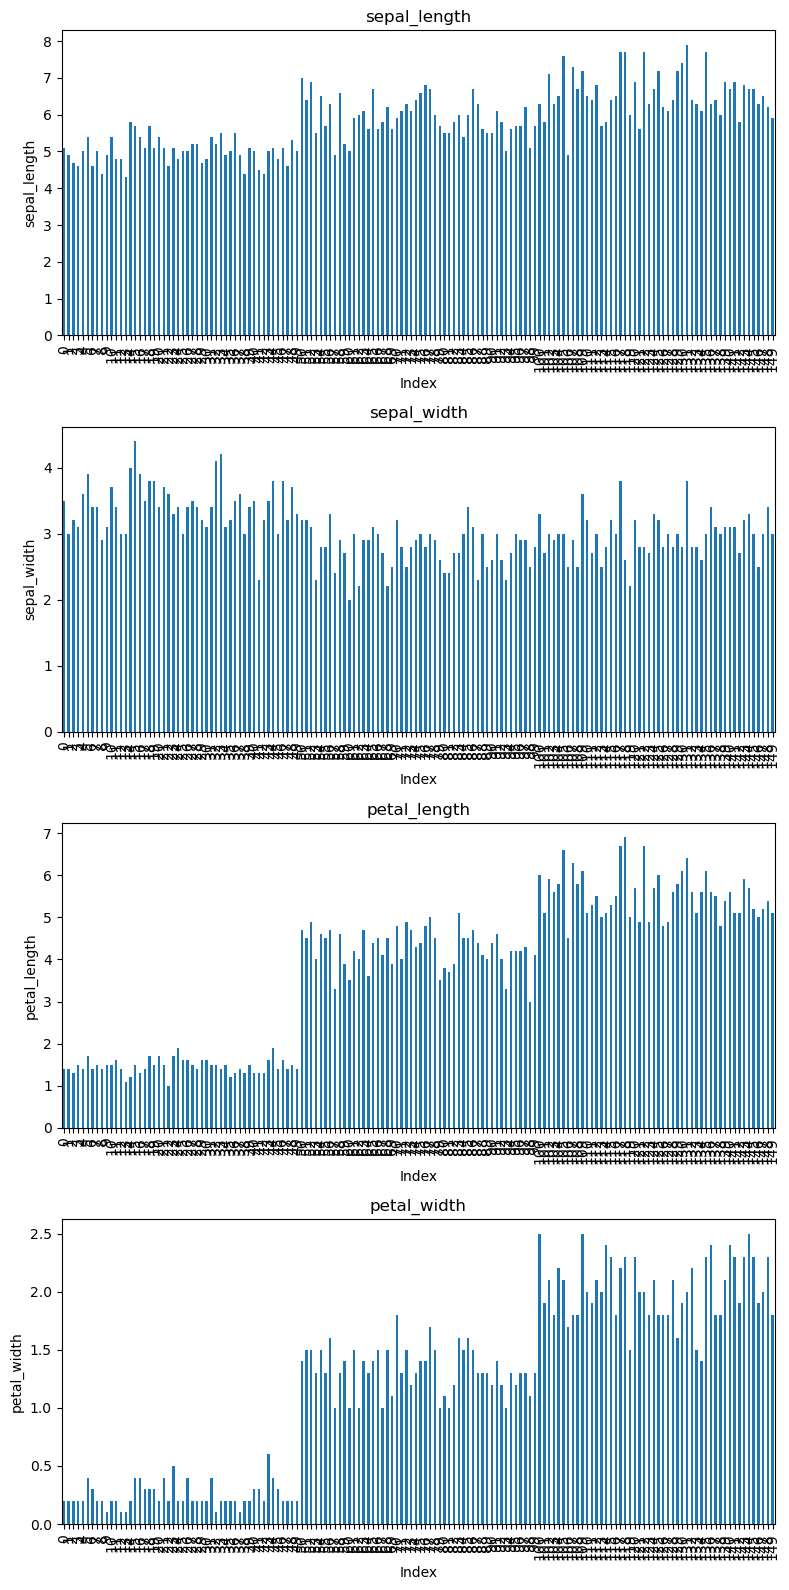

In [40]:
import matplotlib.pyplot as plt
# Function to plot each column as a bar plot
def plot_columns_as_barplot(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(8, 4 * num_columns))
    
    # Check if there's only one column to avoid indexing issues
    if num_columns == 1:
        axes = [axes]
    
    for i, col in enumerate(df.columns):
        ax = axes[i]
        df[col].plot(kind='bar', ax=ax, title=col)
        ax.set_ylabel(col)
        ax.set_xlabel('Index')

    plt.tight_layout()
    plt.show()

# Plotting the DataFrame
plot_columns_as_barplot(df.drop(["species"], axis = 1))

# Use quantile transformer to change distribution of petal length and petal width

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

df = load_iris(as_frame=True)["data"]
y = load_iris(as_frame=True)["target"]
df["species"] = y
data = df.rename({"petal width (cm)": "petal_width",
            "petal length (cm)": "petal_length",
            "sepal length (cm)": "sepal_length",
            "sepal width (cm)": "sepal_width",
}, axis =1)# Create a QuantileTransformer instance
quantile_transformer = QuantileTransformer(output_distribution='uniform', random_state=0)

# Apply the transformation
data['feature1_equalized'] = quantile_transformer.fit_transform(data[['petal_length']])
data['feature2_equalized'] = quantile_transformer.fit_transform(data[['petal_width']])

/home/sawaiz/anaconda3/envs/snetwork/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/home/sawaiz/anaconda3/envs/snetwork/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


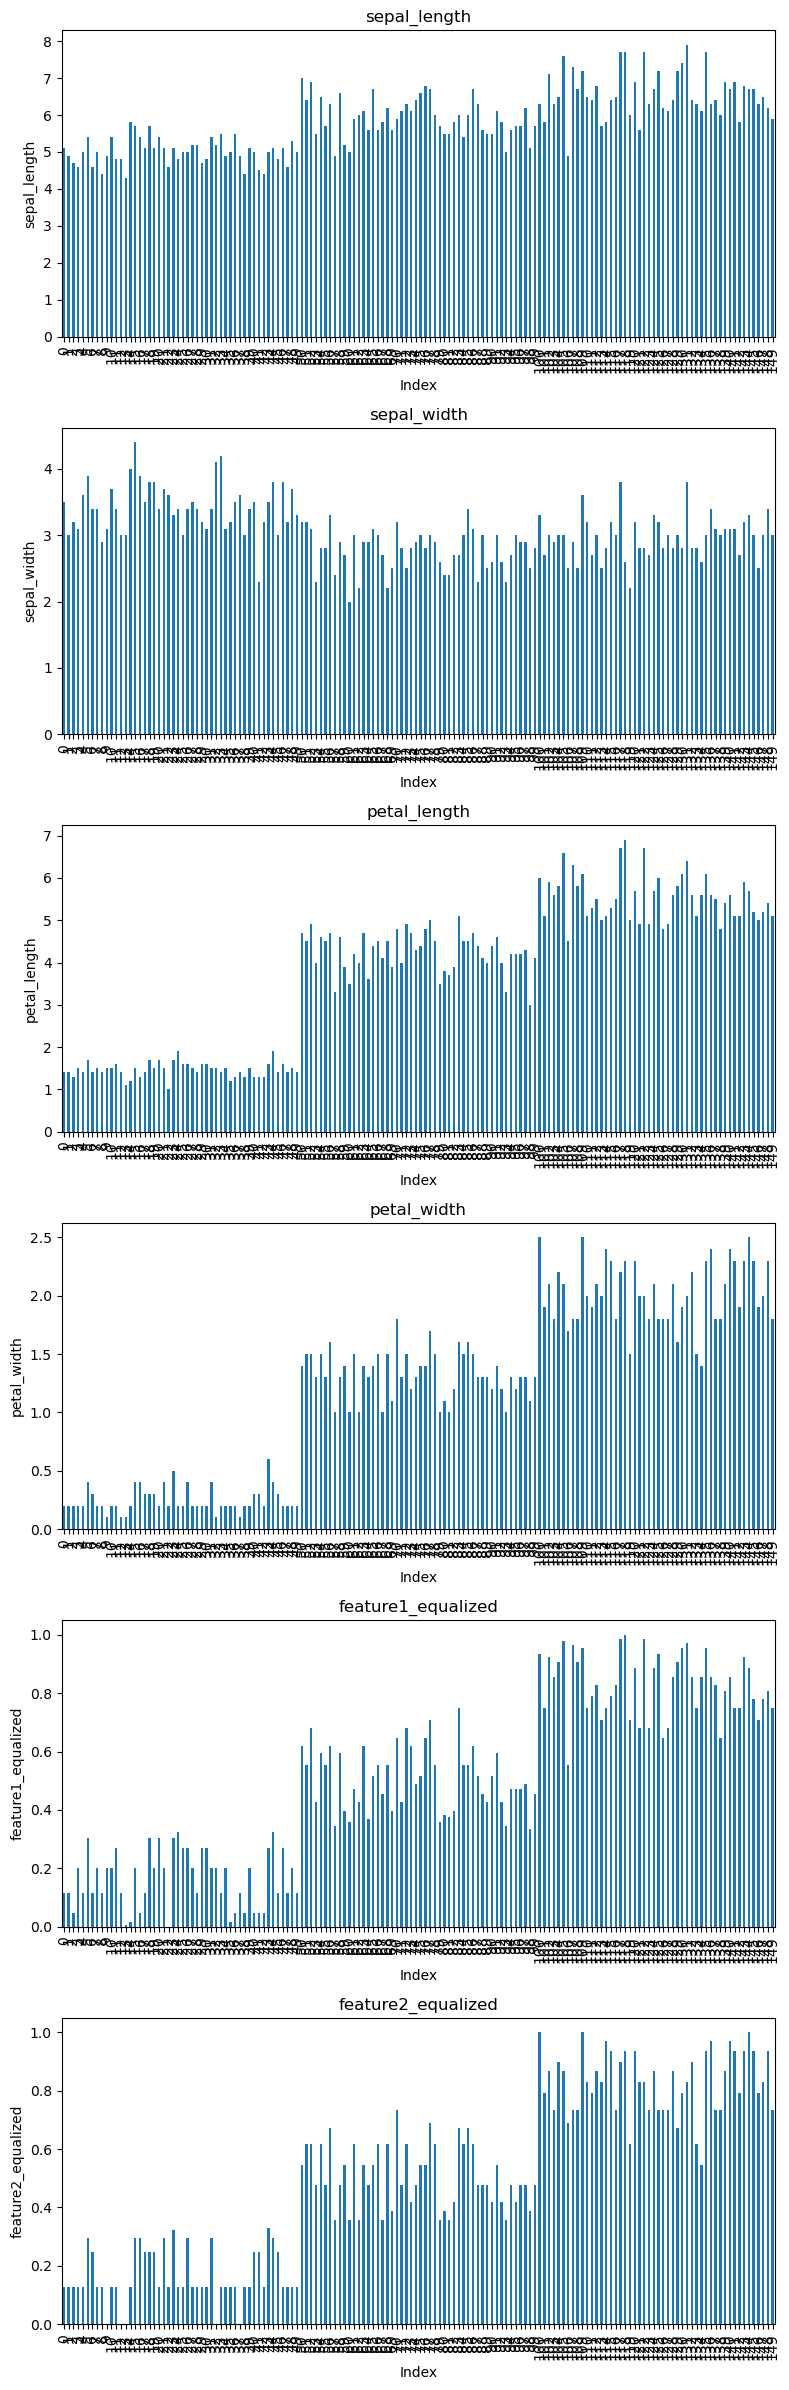

In [42]:
import matplotlib.pyplot as plt
# Function to plot each column as a bar plot
def plot_columns_as_barplot(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(8, 4 * num_columns))
    
    # Check if there's only one column to avoid indexing issues
    if num_columns == 1:
        axes = [axes]
    
    for i, col in enumerate(df.columns):
        ax = axes[i]
        df[col].plot(kind='bar', ax=ax, title=col)
        ax.set_ylabel(col)
        ax.set_xlabel('Index')

    plt.tight_layout()
    plt.show()

# Plotting the DataFrame
plot_columns_as_barplot(data.drop(["species"], axis = 1))

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:

sScaler = StandardScaler()
df_scaled = sScaler.fit_transform(df.drop(["petal_width", "petal_length", "species"], axis = 1))

KeyError: "['petal_width', 'petal_length'] not found in axis"

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.7117346  0.23329579]
[20.66496457 11.83120751]


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

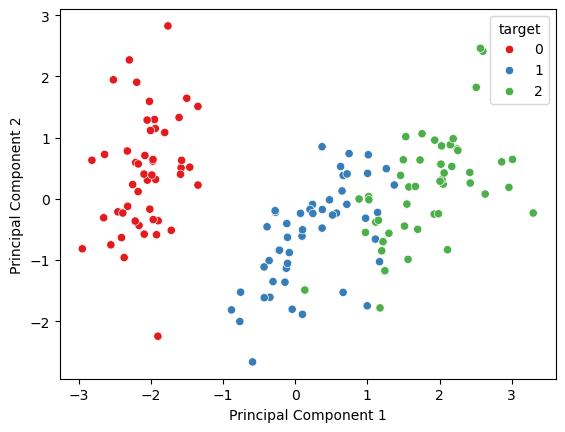

In [46]:
import seaborn as sns

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['target'] = df["species"]

# Plot the PCA results
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', palette='Set1', data=df_pca)

# Without scaled

In [47]:
df = load_iris(as_frame=True)["data"]
y = load_iris(as_frame=True)["target"]
df["species"] = y
df = df.rename({"petal width (cm)": "petal_width",
            "petal length (cm)": "petal_length",
            "sepal length (cm)": "sepal_length",
            "sepal width (cm)": "sepal_width",
}, axis =1)

pca = PCA(n_components=2)
df_pca_unscaled = pca.fit_transform(df.iloc[:, :4])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92461872 0.05306648]
[25.09996044  6.01314738]


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

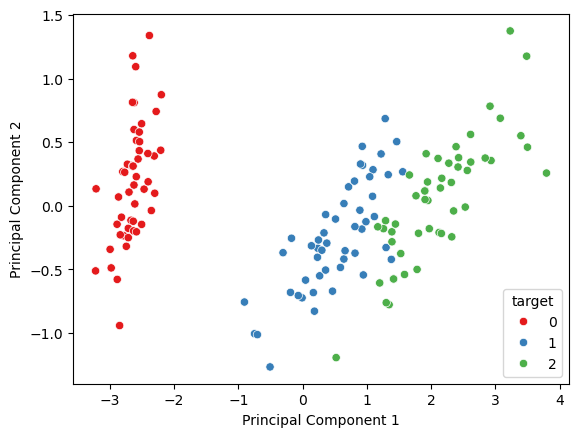

In [48]:
import seaborn as sns

# Create a DataFrame with the PCA results
df_pca_unscaled = pd.DataFrame(data=df_pca_unscaled, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_unscaled['target'] = df["species"]

# Plot the PCA results
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', palette='Set1', data=df_pca_unscaled)

# Directly scaled

In [49]:
df = load_iris(as_frame=True)["data"]
y = load_iris(as_frame=True)["target"]
df["species"] = y
df = df.rename({"petal width (cm)": "petal_width",
            "petal length (cm)": "petal_length",
            "sepal length (cm)": "sepal_length",
            "sepal width (cm)": "sepal_width",
}, axis =1)
sScaler_direct = StandardScaler()
df_scaled = sScaler.fit_transform(df.drop(["species"], axis = 1))

In [50]:
pca = PCA(n_components=2)
pca_direc_scaled = pca.fit_transform(df_scaled)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.72962445 0.22850762]
[20.92306556 11.7091661 ]


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

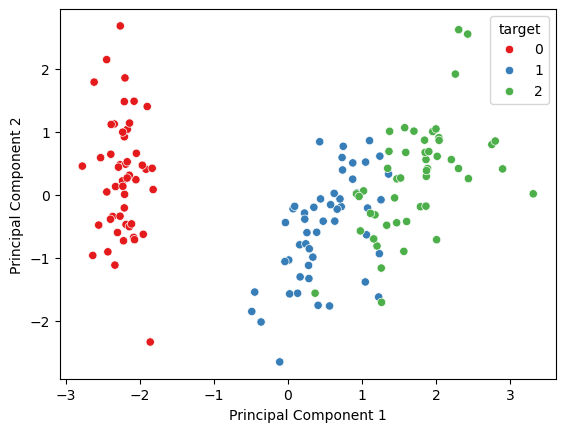

In [51]:
import seaborn as sns

# Create a DataFrame with the PCA results
df_pca_scaled = pd.DataFrame(data=pca_direc_scaled, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_scaled['target'] = df["species"]

# Plot the PCA results
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', palette='Set1', data=df_pca_scaled)

# GPT results for transformation

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = load_iris(as_frame=True)["data"]
y = load_iris(as_frame=True)["target"]
df["species"] = y
iris = df.rename({"petal width (cm)": "petal_width",
            "petal length (cm)": "petal_length",
            "sepal length (cm)": "sepal_length",
            "sepal width (cm)": "sepal_width",
}, axis =1)

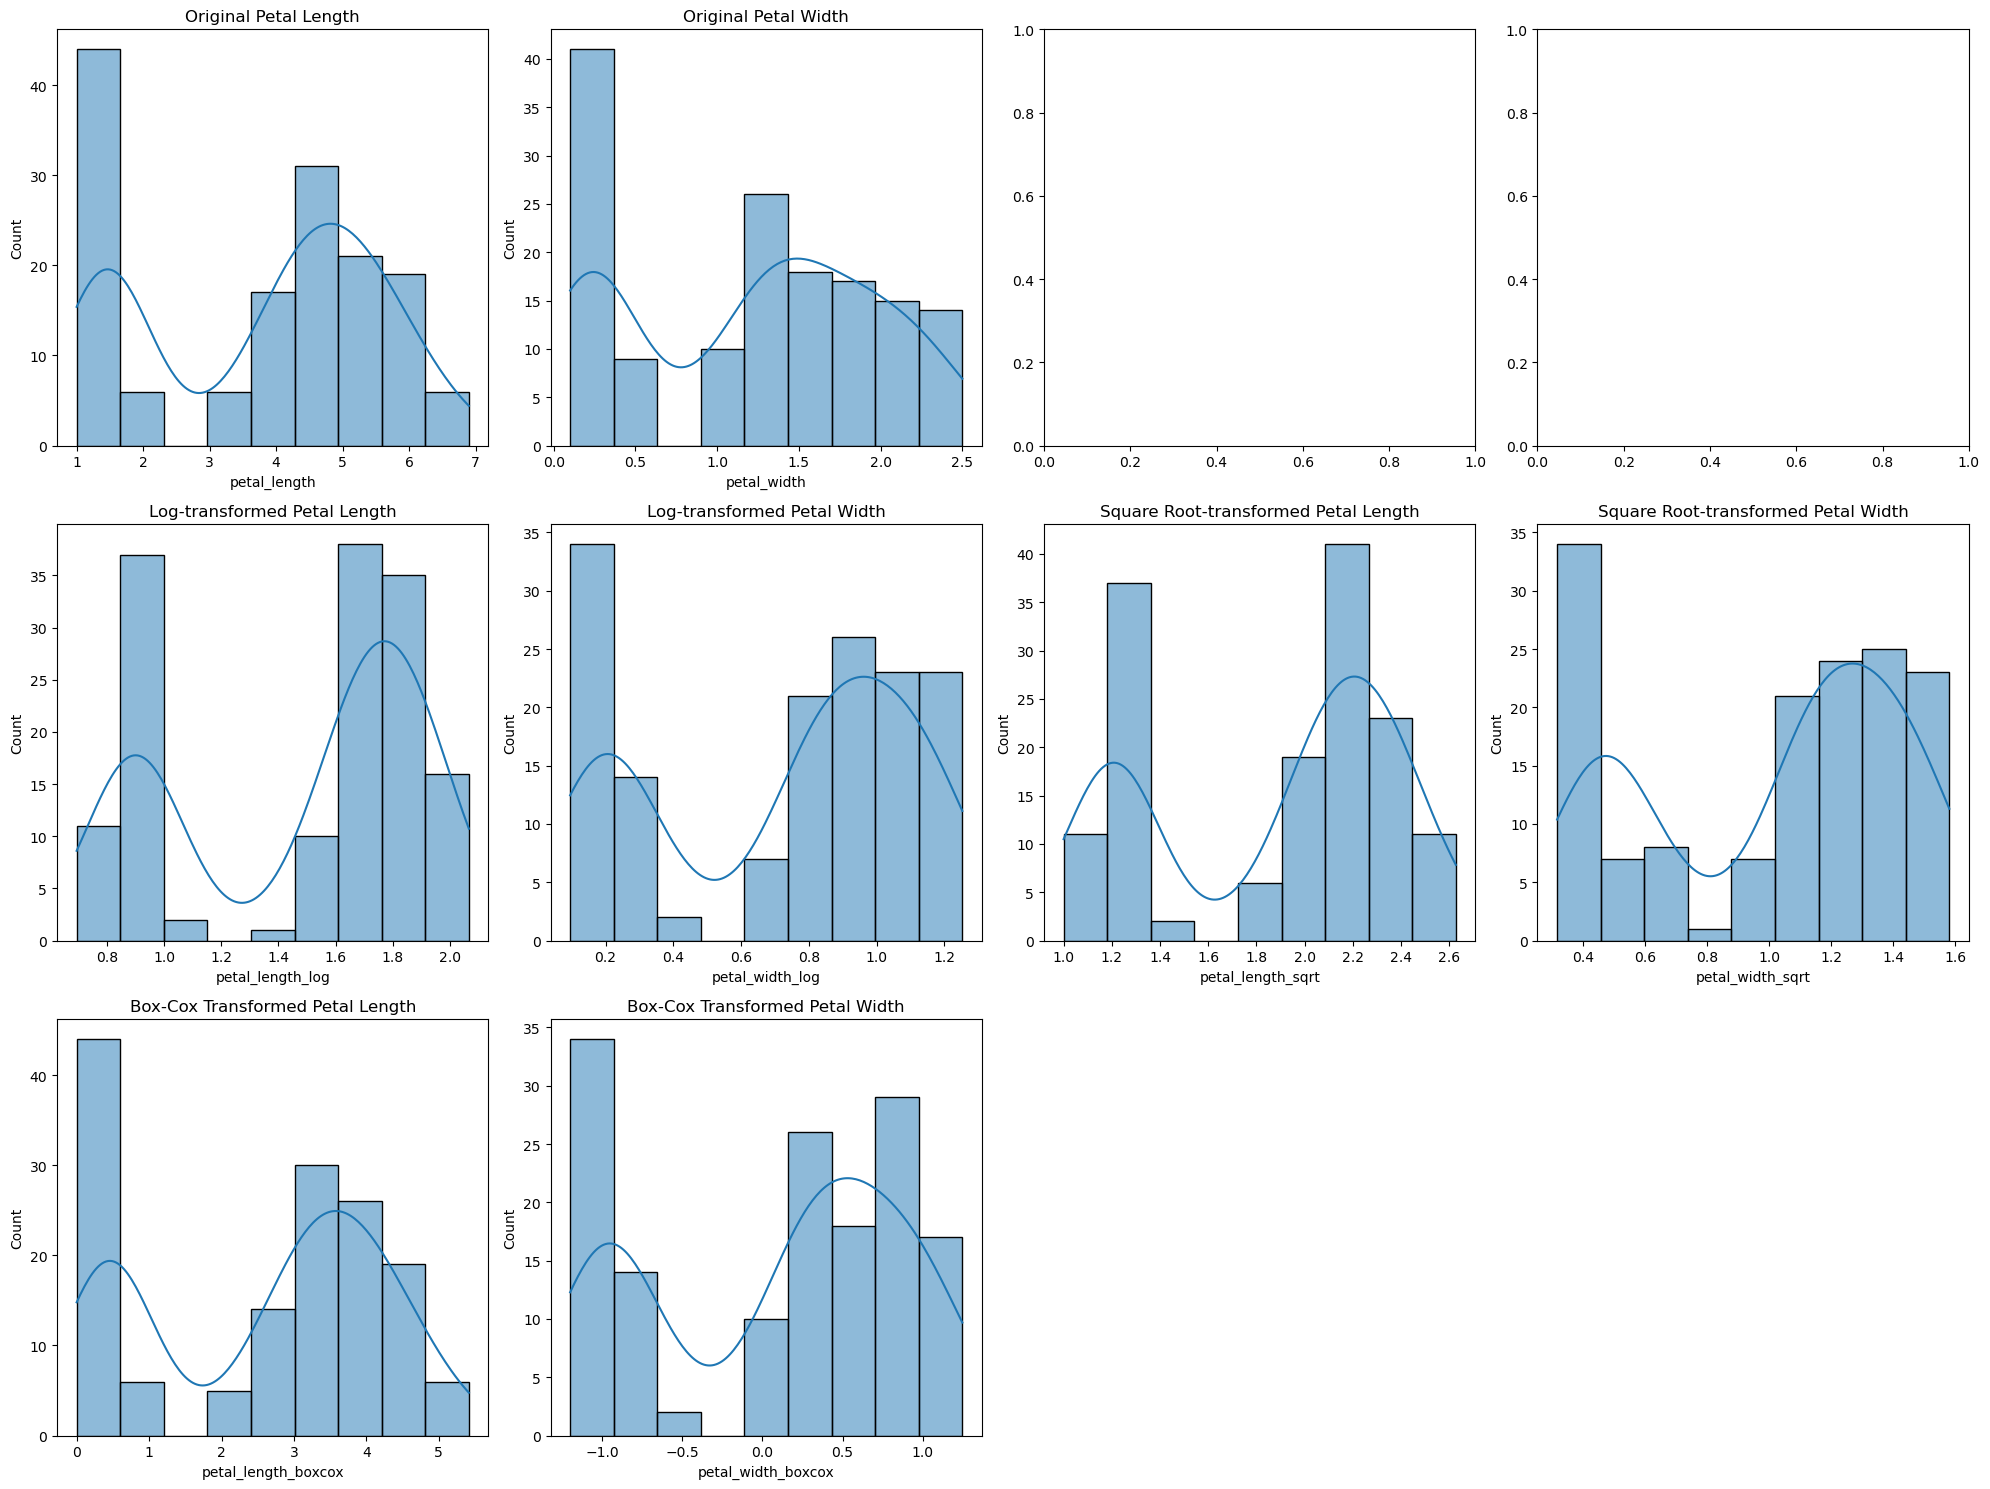

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Apply transformations
iris['petal_length_log'] = np.log1p(iris['petal_length'])
iris['petal_width_log'] = np.log1p(iris['petal_width'])

iris['petal_length_sqrt'] = np.sqrt(iris['petal_length'])
iris['petal_width_sqrt'] = np.sqrt(iris['petal_width'])

iris['petal_length_boxcox'], _ = stats.boxcox(iris['petal_length'])
iris['petal_width_boxcox'], _ = stats.boxcox(iris['petal_width'])

# Plotting the original and transformed distributions
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Original distributions
sns.histplot(iris['petal_length'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Petal Length')

sns.histplot(iris['petal_width'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Original Petal Width')

# Log-transformed distributions
sns.histplot(iris['petal_length_log'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log-transformed Petal Length')

sns.histplot(iris['petal_width_log'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Log-transformed Petal Width')

# Square root-transformed distributions
sns.histplot(iris['petal_length_sqrt'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Square Root-transformed Petal Length')

sns.histplot(iris['petal_width_sqrt'], kde=True, ax=axes[1, 3])
axes[1, 3].set_title('Square Root-transformed Petal Width')

# Box-Cox transformed distributions
sns.histplot(iris['petal_length_boxcox'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Box-Cox Transformed Petal Length')

sns.histplot(iris['petal_width_boxcox'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Box-Cox Transformed Petal Width')

# Remove empty plots and adjust layout
for i in range(2, 4):
    fig.delaxes(axes[2, i])

plt.tight_layout()
plt.show()


In [54]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'petal_length_log', 'petal_width_log', 'petal_length_sqrt',
       'petal_width_sqrt', 'petal_length_boxcox', 'petal_width_boxcox'],
      dtype='object')

In [55]:
droppers = ['petal_length', 'petal_width', 'petal_length_log', 'petal_width_log', 'petal_length_boxcox', 'petal_width_boxcox']

In [56]:
df = iris.drop(droppers, axis=1)

In [57]:
df.head()

,sepal_length,sepal_width,species,petal_length_sqrt,petal_width_sqrt
0,5.1,3.5,0,1.183216,0.447214
1,4.9,3.0,0,1.183216,0.447214
2,4.7,3.2,0,1.140175,0.447214
3,4.6,3.1,0,1.224745,0.447214
4,5.0,3.6,0,1.183216,0.447214


In [58]:
sScaler_direct = StandardScaler()
df_scaled_sqrt = sScaler.fit_transform(df.drop(["species"], axis = 1))

In [59]:
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(df_scaled_sqrt)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.73489363 0.22621648]
[20.99848041 11.65031705]


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

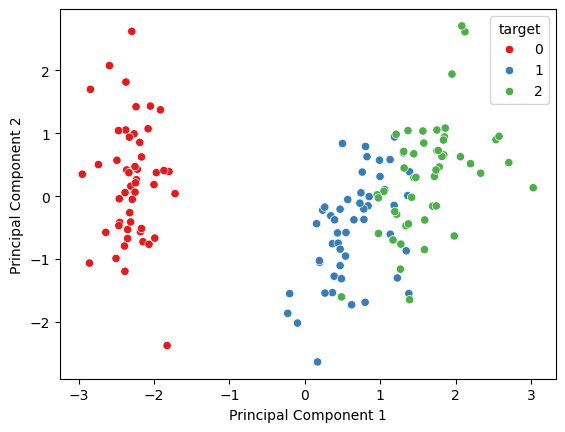

In [60]:
import seaborn as sns

# Create a DataFrame with the PCA results
df_pca_scaled = pd.DataFrame(data=pca_scaled, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_scaled['target'] = df["species"]

# Plot the PCA results
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', palette='Set1', data=df_pca_scaled)

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_scaled)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_


/home/sawaiz/anaconda3/envs/snetwork/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


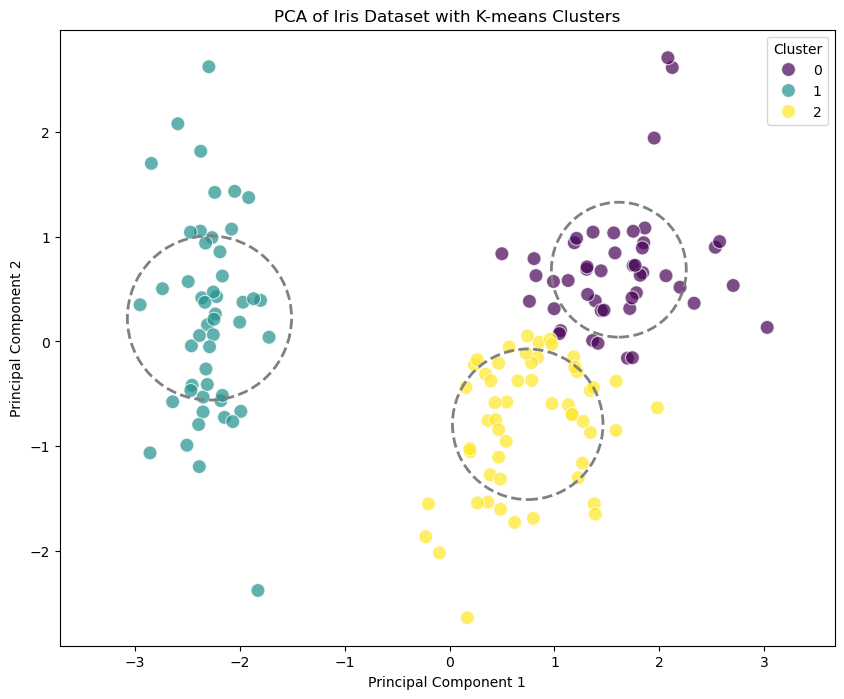

In [63]:


#  Create a DataFrame with PCA results and clusters
pca_df = pd.DataFrame(data=pca_scaled, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
pca_df['Species'] = df["species"]

# Calculate the radius for circles (based on standard deviation)
radii = []
for i in range(3):
    points_in_cluster = pca_scaled[clusters == i]
    centroid = centroids[i]
    distances = np.linalg.norm(points_in_cluster - centroid, axis=1)
    radius = np.mean(distances)
    radii.append(radius)

# Visualize the PCA results with K-means clusters and circles
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)

# Draw circles around clusters
for i, centroid in enumerate(centroids):
    circle = plt.Circle(centroid, radii[i], color='grey', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

plt.title('PCA of Iris Dataset with K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.axis('equal')  # Ensure the circles are round
plt.show()


# Conclusion
The object of this exercise was to explore the affects of standardization and normalization on the iris dataset. I believe I haven't seen anything substiantial while performing standardization in different ways. Maybe the form of data is not suitable always for visualization so we would have to standardize the values

In [74]:
df = load_iris(as_frame=True)["data"]
y = load_iris(as_frame=True)["target"]
df["species"] = y
iris = df.rename({"petal width (cm)": "petal_width",
            "petal length (cm)": "petal_length",
            "sepal length (cm)": "sepal_length",
            "sepal width (cm)": "sepal_width",
}, axis =1)

In [75]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [76]:
iris_x = iris.drop(["species"], axis =1)

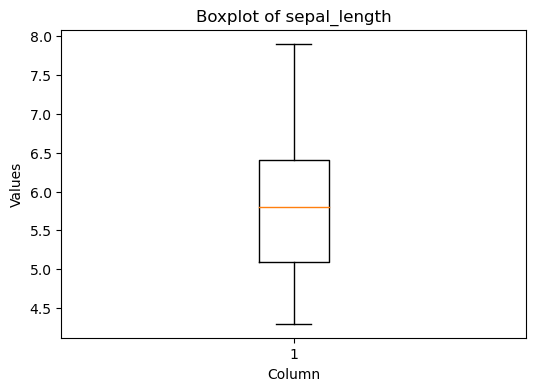

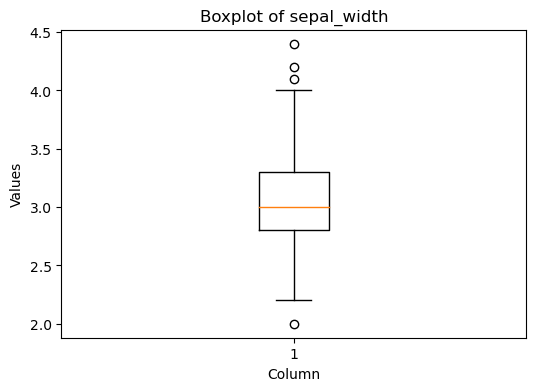

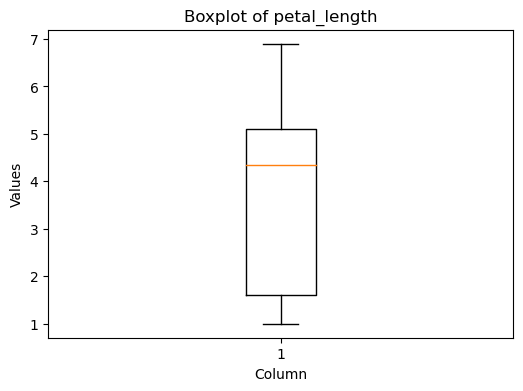

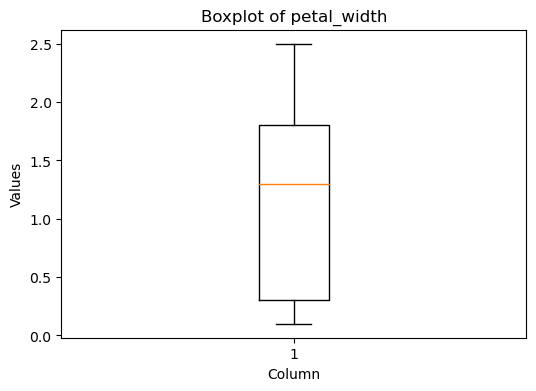

In [77]:
# Create box plots for each column
for column in iris_x.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(iris_x[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Column')
    plt.ylabel('Values')
    plt.show()

In [78]:
# Define the lower and upper bounds for clipping
lower_bound = 0  # Specify your lower bound
upper_bound = 100  # Specify your upper bound

# Clip the values of the column to the specified range
iris_x['sepal_width'] = iris_x['sepal_width'].clip(lower=2.1, upper=4)

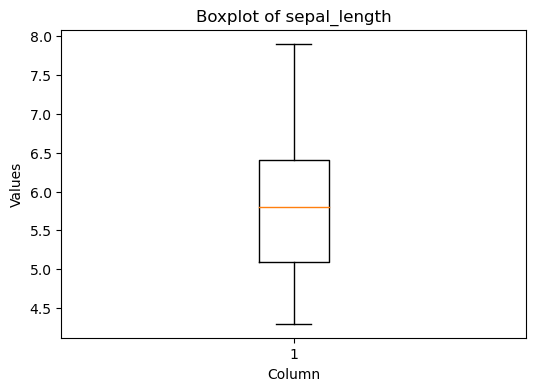

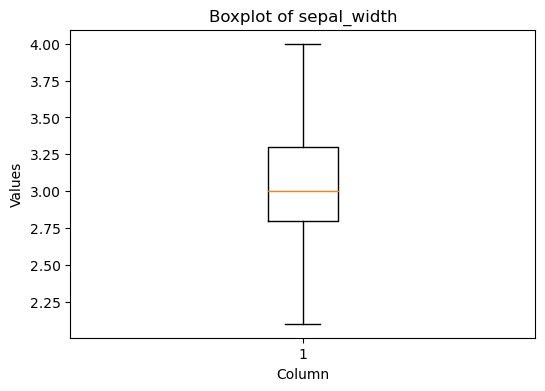

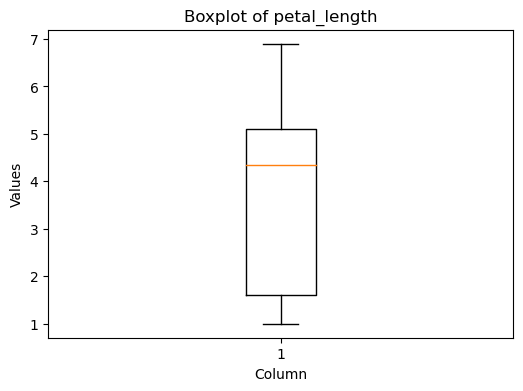

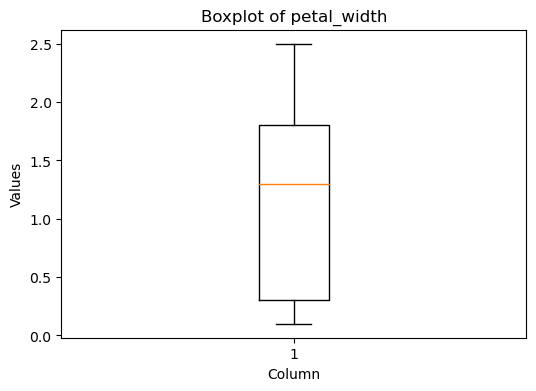

In [79]:
# Create box plots for each column
for column in iris_x.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(iris_x[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Column')
    plt.ylabel('Values')
    plt.show()

In [80]:
iris_x.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.119310,0.871754,0.817941
sepal_width,-0.119310,1.000000,-0.428017,-0.365170
petal_length,0.871754,-0.428017,1.000000,0.962865
petal_width,0.817941,-0.365170,0.962865,1.000000


In [81]:
# drop petal_length and petal_width since they are highly correlated with sepal_length.
# Their distribution is also normal

In [82]:
iris_x = iris_x.drop(["petal_width"], axis = 1)

[0.92687209 0.05844029]
[23.44562455  5.88719068]


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

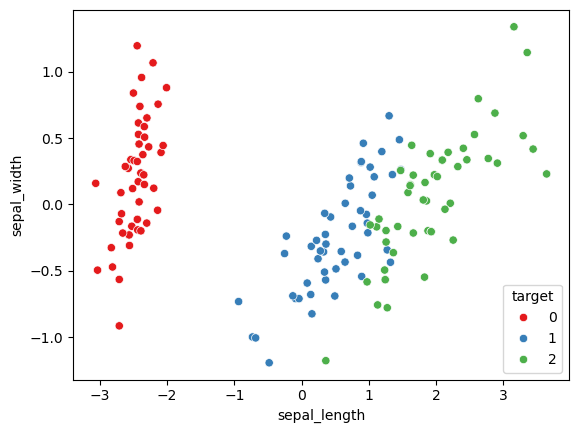

In [83]:
sScaler_direct = StandardScaler()
df_refined = sScaler.fit_transform(iris_x)


pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(iris_x)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

import seaborn as sns

df_refined = pd.DataFrame(data=pca_scaled, columns=['sepal_length', 'sepal_width'])

# Create a DataFrame with the PCA results
df_refined['target'] = iris["species"]

# Plot the PCA results
sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', palette='Set1', data=df_refined)

# Conclusion
I did not evaluate the dataset with respect to class labels. I did not find outliers considering a single class as well. Which makes more sense to me